# Simple regression with TensorFlow

Progressive example working through various network set ups

https://towardsdatascience.com/training-neural-networks-for-price-prediction-with-tensorflow-8aafe0c55198

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneGroupOut

In [2]:
dat = pd.read_csv("./rbfs/phi_short_reduce.csv")
dat.head()
#X = np.load("./rbfs/phi_reduce.npy")
#y = np.load("./rbfs/y.npy")

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,194,195,196,197,198,199,200,y,site,date
0,0,1.000000,0.962154,0.856997,0.706648,0.539408,0.381171,0.249352,0.151007,0.084658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014,2005,2023-01-01
1,1,0.999972,0.964124,0.860533,0.711037,0.543884,0.385132,0.252466,0.153209,0.086071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007,2005,2023-01-01
2,2,0.999889,0.966044,0.864036,0.715413,0.548366,0.389112,0.255604,0.155436,0.087503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,2005,2023-01-01
3,3,0.999749,0.967914,0.867505,0.719775,0.552855,0.393111,0.258767,0.157686,0.088954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,2005,2023-01-01
4,4,0.999555,0.969734,0.870939,0.724124,0.557350,0.397130,0.261955,0.159960,0.090424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,2005,2023-01-01


In [3]:
dat2 = dat[dat['date'] == "2023-01-01"]
dat2.shape

(191, 205)

In [4]:
dat2 = dat2.groupby('site')

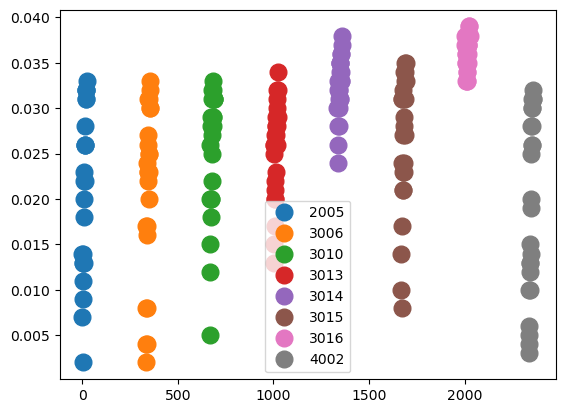

In [5]:
# Plot
fig, ax = plt.subplots()

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in dat2:
    ax.plot(group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [6]:
X = dat.iloc[:, 1:202]
y = dat['y']
groups = dat['site']
logo = LeaveOneGroupOut()
logo.get_n_splits(X, y, groups)

8

In [7]:
mygrps = groups.unique()
n_grps = len(mygrps)

## Cross-validation loop

In [8]:
my_mae = np.empty(n_grps)
my_y_true = []
my_y_pred = []

In [9]:
for i, (train_index, test_index) in enumerate(logo.split(X, y, groups)):
    print(f"Fold {i}:")
    print(f"Site {mygrps[i]}:")
    #print(f"  Train: index={train_index}, group={groups[train_index]}")
    #print(f"  Test:  index={test_index}, group={groups[test_index]}")

    # Split out data
    X_train = X.iloc[train_index, :]
    print(X_train.shape)
    y_train = y[train_index]
    n_feat = X_train.shape[1]
    
    X_test = X.iloc[test_index, :]
    print(X_test.shape)
    y_test = y[test_index]

    # Build model
    aq_rf = ensemble.RandomForestRegressor()

    # Train model
    aq_rf.fit(X_train, y_train)
    
    ## Predict for test set
    y_test_pred = aq_rf.predict(X_test)
    my_mae[i] = mean_absolute_error(y_test, y_test_pred)
    print(f"MAE: {my_mae[i]}")
    
    my_y_true.append(y_test.to_numpy())
    my_y_pred.append(y_test_pred)


Fold 0:
Site 2005:
(2336, 201)
(333, 201)
MAE: 0.006930690690690681
Fold 1:
Site 3006:
(2335, 201)
(334, 201)
MAE: 0.004779281437125751
Fold 2:
Site 3010:
(2335, 201)
(334, 201)
MAE: 0.0034228742514970014
Fold 3:
Site 3013:
(2335, 201)
(334, 201)
MAE: 0.011378982035928149
Fold 4:
Site 3014:
(2335, 201)
(334, 201)
MAE: 0.0065371856287425225
Fold 5:
Site 3015:
(2335, 201)
(334, 201)
MAE: 0.0035663772455089876
Fold 6:
Site 3016:
(2337, 201)
(332, 201)
MAE: 0.006044819277108429
Fold 7:
Site 4002:
(2335, 201)
(334, 201)
MAE: 0.003943532934131734


In [10]:
my_y_pred

[array([0.02037, 0.02075, 0.02115, 0.02199, 0.02095, 0.02229, 0.02226,
        0.02246, 0.02275, 0.02257, 0.02591, 0.02727, 0.02804, 0.03014,
        0.03029, 0.03095, 0.03176, 0.03157, 0.03267, 0.03248, 0.03231,
        0.0332 , 0.03498, 0.03507, 0.03512, 0.03491, 0.03409, 0.03425,
        0.03363, 0.03364, 0.03215, 0.03147, 0.03171, 0.03194, 0.03306,
        0.0336 , 0.03446, 0.03479, 0.03492, 0.0338 , 0.03283, 0.03089,
        0.029  , 0.02782, 0.02709, 0.02667, 0.02568, 0.02651, 0.02491,
        0.02388, 0.02485, 0.02281, 0.02357, 0.02338, 0.02021, 0.01773,
        0.01754, 0.01917, 0.02287, 0.02779, 0.02929, 0.03059, 0.03141,
        0.0325 , 0.03034, 0.02744, 0.02325, 0.0204 , 0.01567, 0.01279,
        0.01242, 0.01008, 0.01139, 0.0149 , 0.01579, 0.01291, 0.01501,
        0.01387, 0.01229, 0.01541, 0.01725, 0.02173, 0.02508, 0.03087,
        0.03348, 0.03608, 0.03707, 0.03647, 0.03379, 0.0308 , 0.02906,
        0.02686, 0.02792, 0.02847, 0.03083, 0.03003, 0.0301 , 0.03091,
      

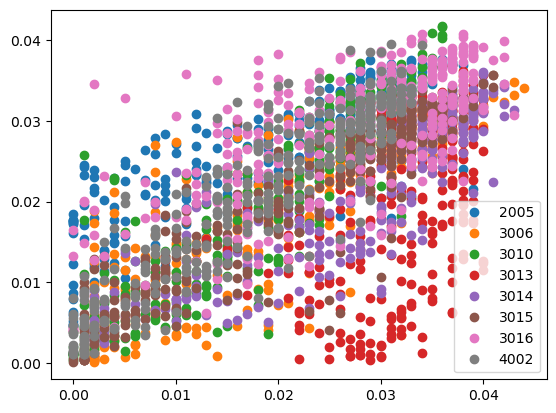

In [11]:
plt.figure()
for i in range(len(mygrps)):
    plt.plot(my_y_true[i], my_y_pred[i], 'o', label = mygrps[i])

plt.legend()
plt.show()

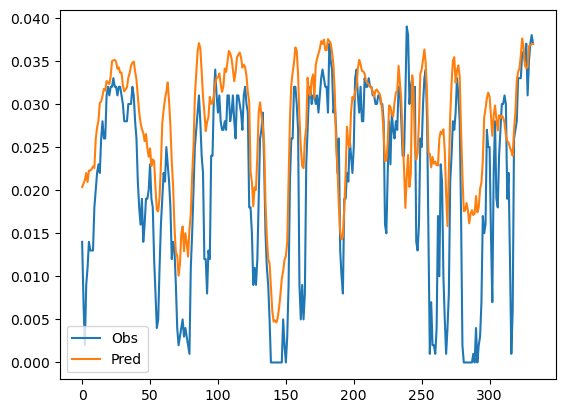

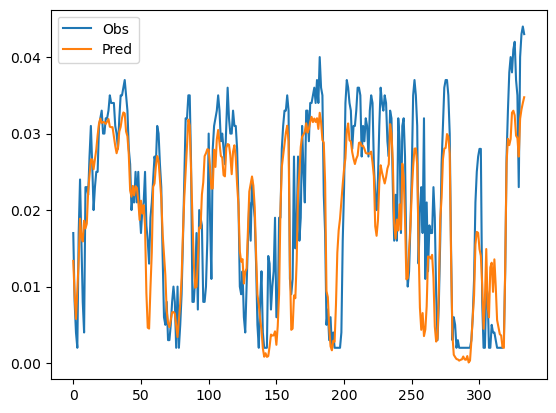

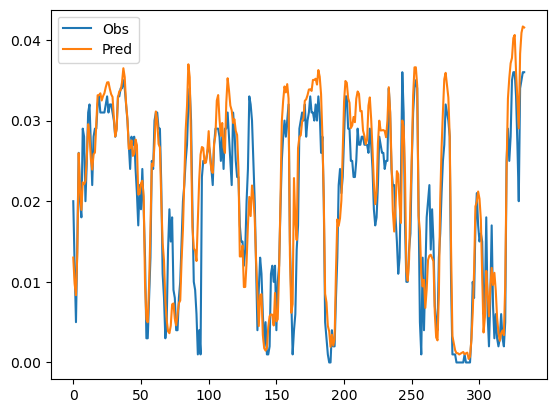

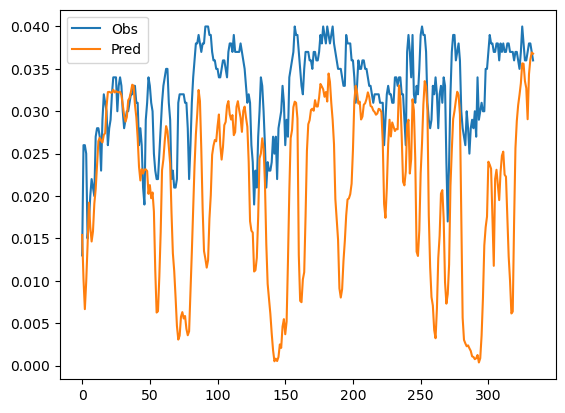

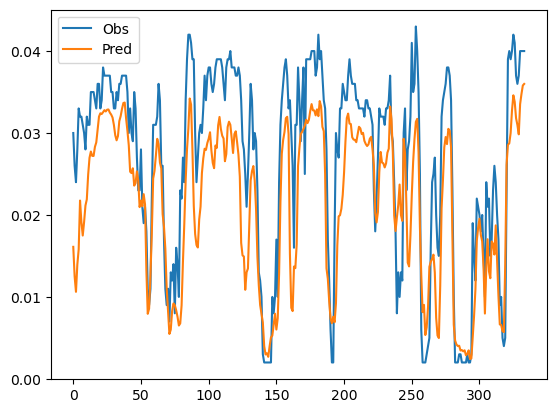

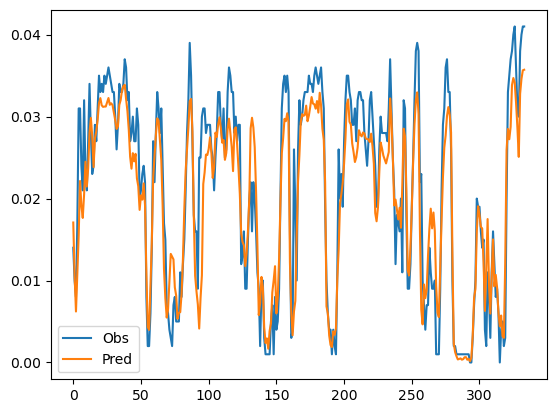

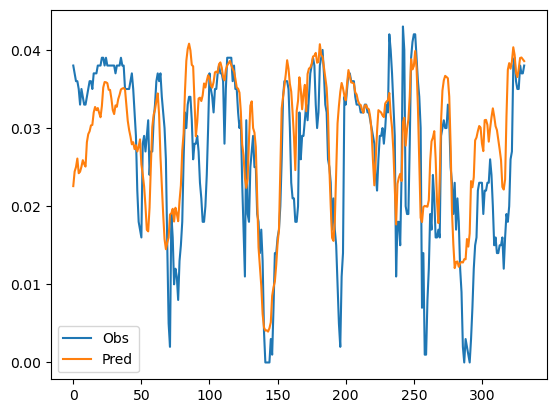

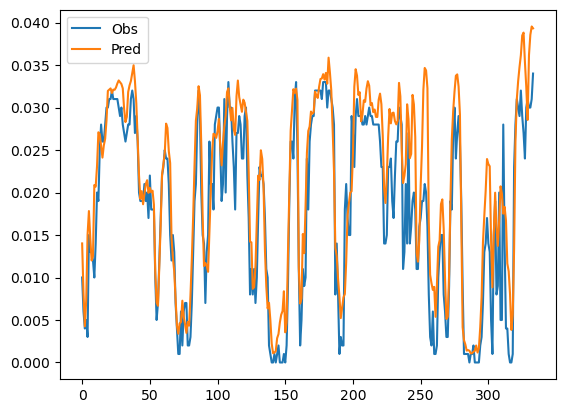

In [12]:
for i in range(len(mygrps)):
    plt.plot(my_y_true[i], label = "Obs")
    plt.plot(my_y_pred[i], label = "Pred")
    plt.legend()
    plt.show()